In [1]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movie_df = pickle.load(open('processed_movie_df.pickle', 'rb'))


In [4]:
crew_budget_df = movie_df[['year','Director_mean_budg',
               'distr_mean_budg',
               'Composer_mean_budg',
               'Cinematographer_mean_budg',
               'Editor_mean_budg',
               'Production Designer_mean_budg',
               'Writer_mean_budg',
               'Producer_mean_budg',
               'Actors_mean_budg']]

In [8]:
def get_distr_size(distr_name):
    if distr_name in small_distr.keys():
        return 'Small Distributors'
    elif distr_name in med_distr.keys():
        return 'Medium Distributors'
    elif distr_name in major_distr.keys():
        return 'Large Distributors'
    else:
        pass

movie_df['distr_size'] = movie_df['distr'].apply(get_distr_size)

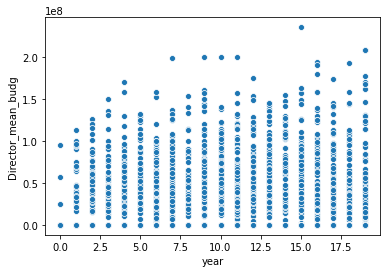

In [6]:
sns.scatterplot(x='year', y='Director_mean_budg', data=crew_budget_df)

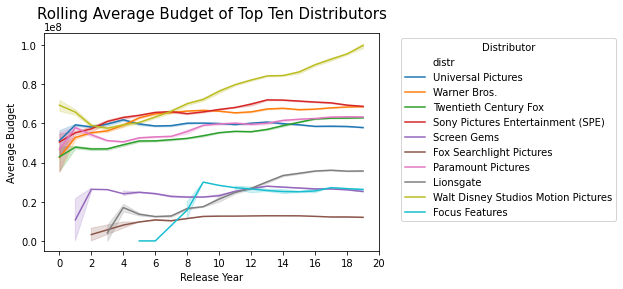

In [297]:
sns.lineplot(x='year', y='distr_mean_budg', data=movie_df[(movie_df.distr.isin(top_distr_dict.keys())) & (movie_df.distr!='New Line Cinema')], hue='distr')
plt.legend(bbox_to_anchor=(1.05, 1), title='Distributor')

plt.ylabel('Average Budget')
plt.xlabel('Release Year')
plt.title('Rolling Average Budget of Top Ten Distributors', fontsize=15, pad=15)
plt.xticks(ticks=np.linspace(0,20,11), );

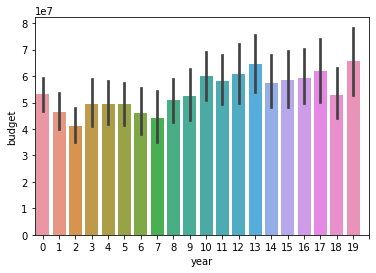

In [295]:
sns.barplot(x='year', y='budget', data=movie_df[(movie_df.distr.isin(top_distr_dict.keys())) & (movie_df.distr!='New Line Cinema')])
plt.xticks(ticks=np.linspace(0,20,21));

In [275]:
top_distr_dict = {x:y for x, y in movie_df.distr.value_counts().head(11).items()}

In [106]:
len(movie_df.distr.unique())

74

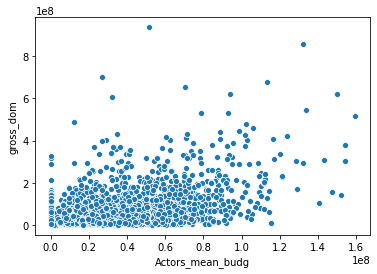

In [299]:
sns.scatterplot(x='Actors_mean_budg', y='gross_dom', data=movie_df)

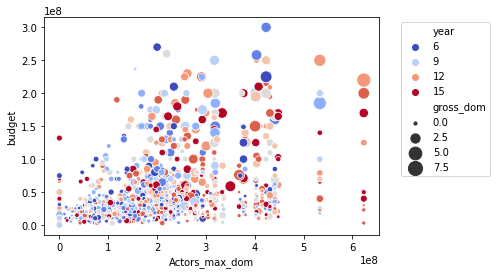

In [107]:
mask = (movie_df.year<15) & (movie_df.distr.isin(top_distr_dict.keys())) &(movie_df.year>5)
sns.scatterplot(x='Actors_max_dom', y='budget', data=movie_df[mask], hue='year', size='gross_dom', sizes=(10,200), palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1))


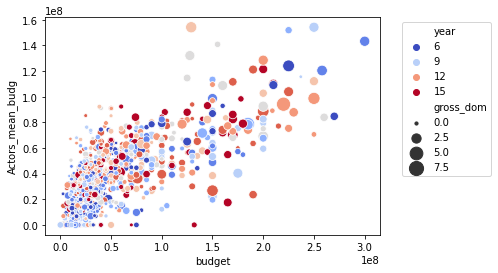

In [298]:
mask = (movie_df.year<15) & (movie_df.distr.isin(top_distr_dict.keys())) &(movie_df.year>5)
sns.scatterplot(x='budget', y='Actors_mean_budg', data=movie_df[mask], hue='year', size='gross_dom', sizes=(10,200), palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1))


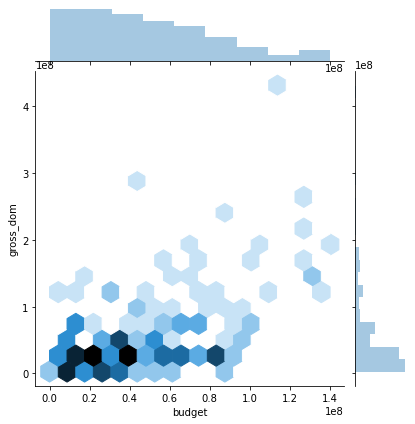

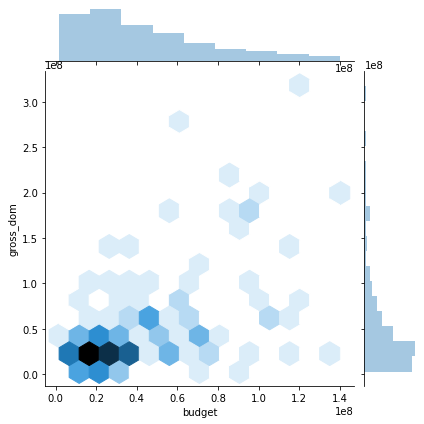

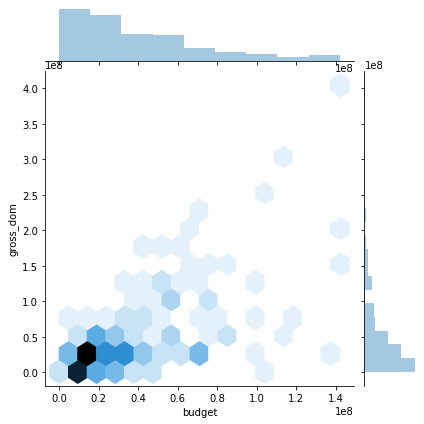

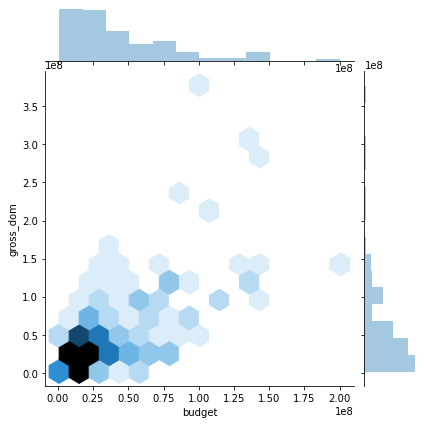

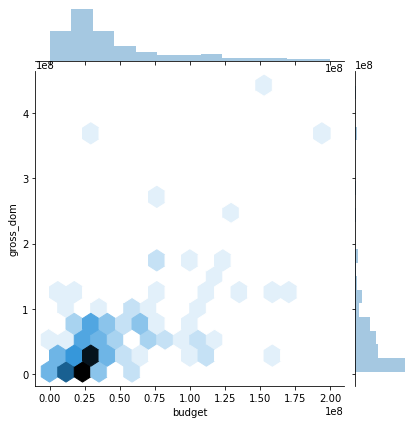

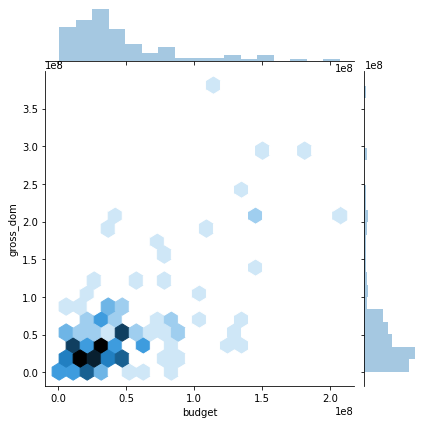

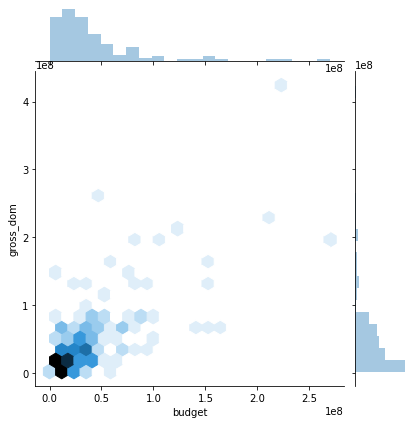

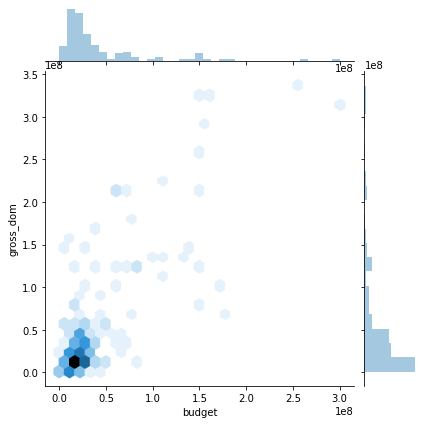

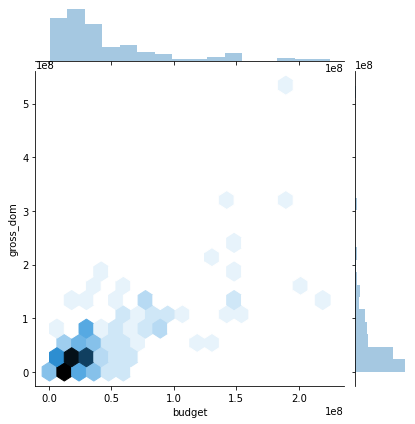

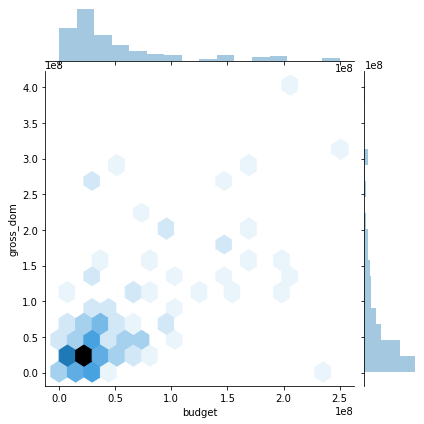

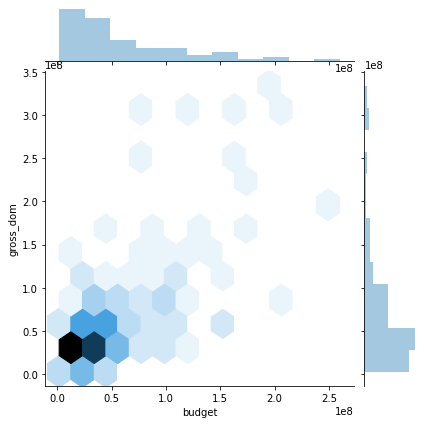

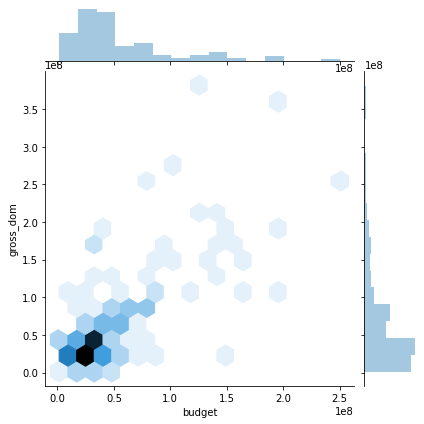

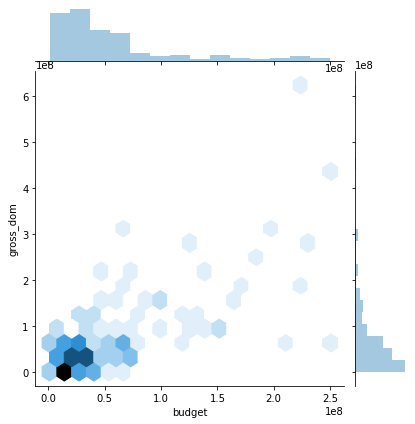

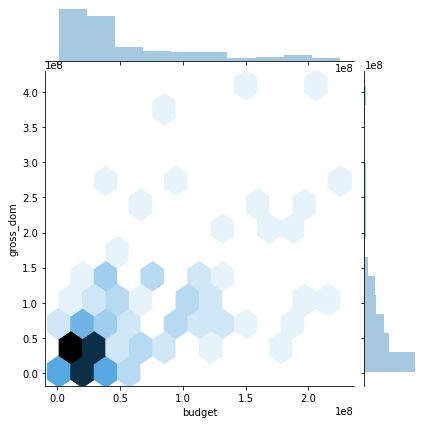

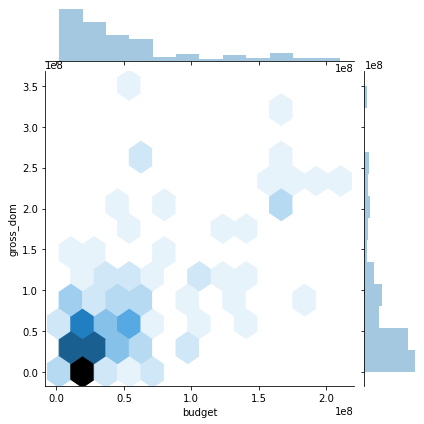

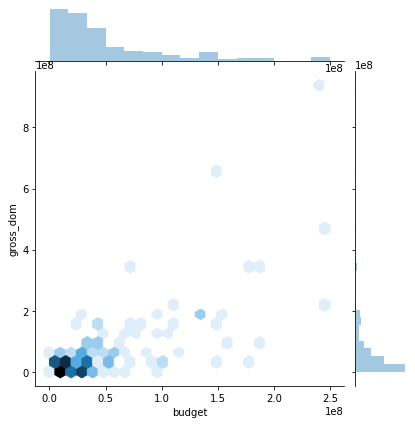

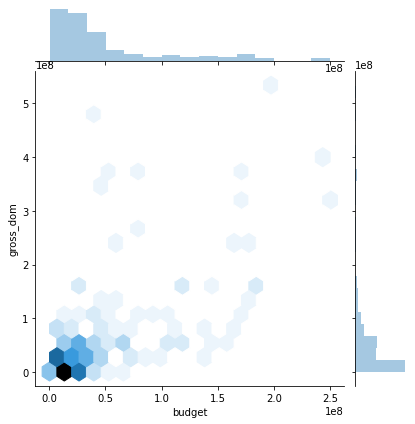

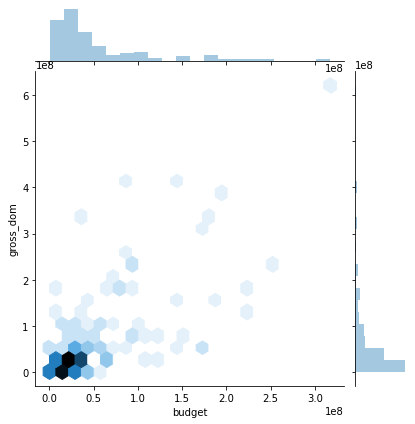

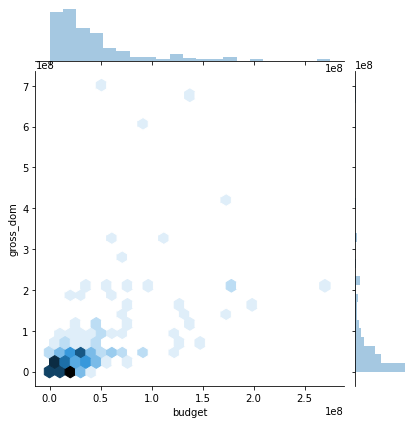

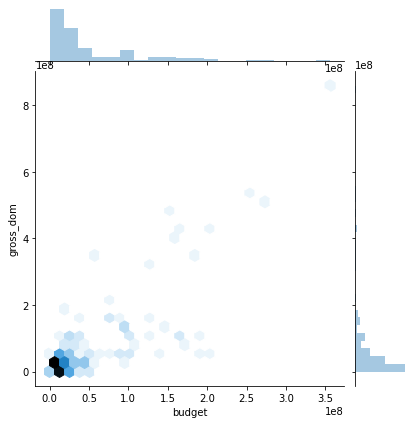

In [124]:
for each in range(20):
    mask = (movie_df.year==each)
    sns.jointplot(y='gross_dom', x='budget', data=movie_df[mask], kind='hex')
    

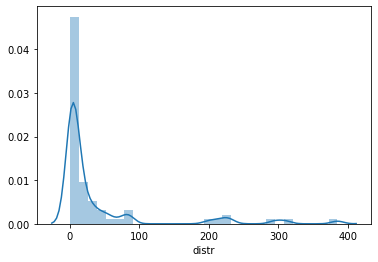

In [128]:
# compare big/med/small distributors
sns.distplot(movie_df.distr.value_counts())

In [129]:
movie_df.distr.value_counts()

Warner Bros.                           385
Universal Pictures                     310
Twentieth Century Fox                  295
Sony Pictures Entertainment (SPE)      230
Walt Disney Studios Motion Pictures    225
                                      ... 
Triumph Releasing Corporation            1
101 Studios                              1
Vertical Entertainment                   1
The Samuel Goldwyn Company               1
8x Entertainment                         1
Name: distr, Length: 74, dtype: int64

In [5]:

# small distributors
small_distr = {x:y for x,y in movie_df.distr.value_counts().items() if y<20}

In [6]:
# medium distributors
med_distr = {x:y for x,y in movie_df.distr.value_counts().items() if y>=20 and y<100}

In [7]:
# major distributors 
major_distr = {x:y for x,y in movie_df.distr.value_counts().items() if y>100}

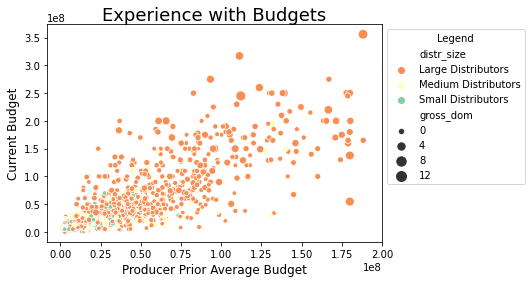

In [12]:
mask = (movie_df.Producer_mean_budg>0) & (movie_df.year>10)

sns.scatterplot(x='Producer_mean_budg', y='budget', data=movie_df[mask], hue='distr_size', palette='Spectral', size='gross_dom', sizes=(20,100), hue_order=['Large Distributors', 'Medium Distributors', 'Small Distributors'])
plt.legend(bbox_to_anchor=[1,1], title='Legend')
plt.xlim(right=2e8)
plt.ylabel('Current Budget', fontsize=12)
plt.xlabel('Producer Prior Average Budget', fontsize=12)
plt.title('Experience with Budgets', fontsize=18, pad=3);

In [146]:
major_distr

{'Warner Bros.': 385,
 'Universal Pictures': 310,
 'Twentieth Century Fox': 295,
 'Sony Pictures Entertainment (SPE)': 230,
 'Walt Disney Studios Motion Pictures': 225,
 'Paramount Pictures': 214,
 'Lionsgate': 200}

In [150]:
plt.figure()
plt.bar(x=movie_df.movie_df[movie_df.distr.isin(major_distr.keys())].gross_dom);
sns.barplot(movie_df[movie_df.distr.isin(med_distr.keys())].gross_dom);
sns.barplot(movie_df[movie_df.distr.isin(small_distr.keys())].gross_dom);


TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 432x288 with 0 Axes>

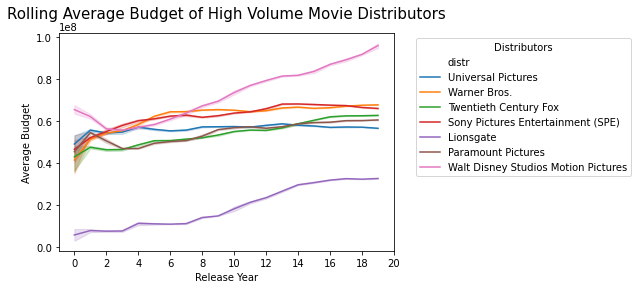

In [294]:
#show that as years go on, the average budget is increasing for some but some stay steady
#distributors who have released over 200 movies in the past 20 years
sns.lineplot(x='year', y='distr_mean_budg', data=movie_df[movie_df.distr.isin(major_distr.keys())], hue='distr')
plt.legend(bbox_to_anchor=(1.05, 1), title='Distributors')

plt.ylabel('Average Budget')
plt.xlabel('Release Year')
plt.title('Rolling Average Budget of High Volume Movie Distributors', fontsize=15, pad=15)
plt.xticks(ticks=np.linspace(0,20,11), );

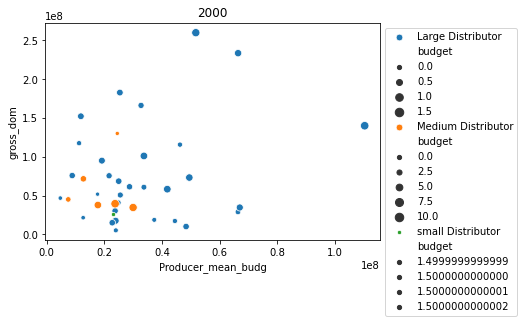

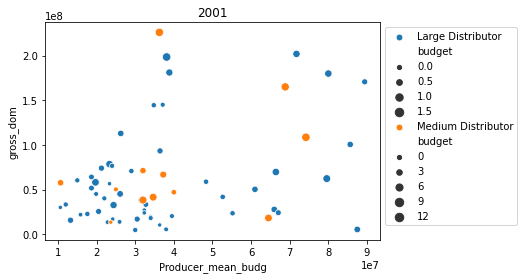

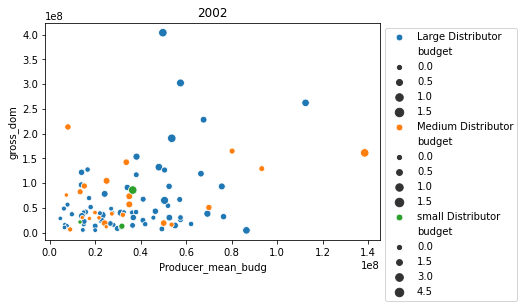

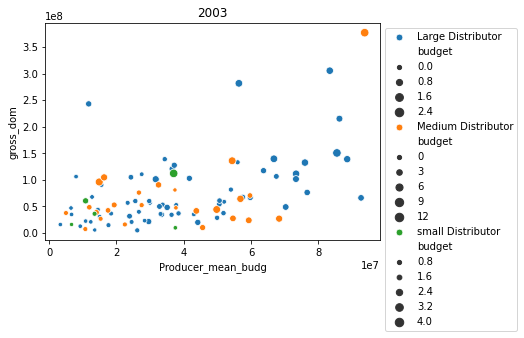

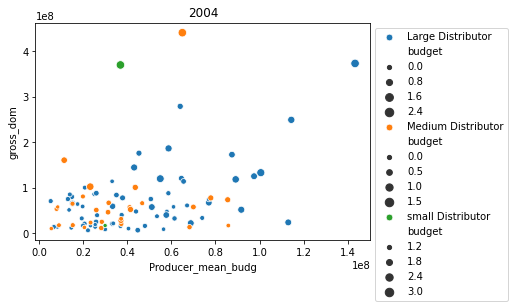

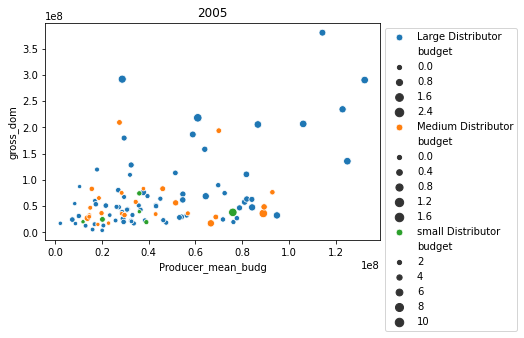

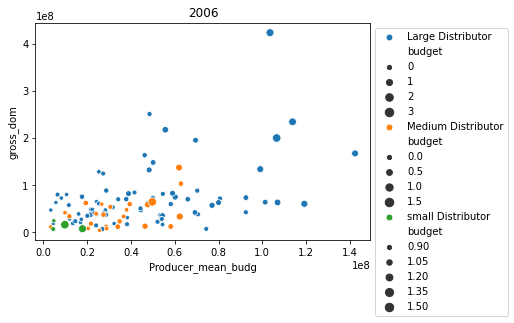

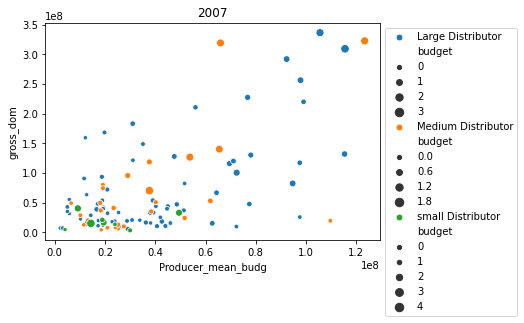

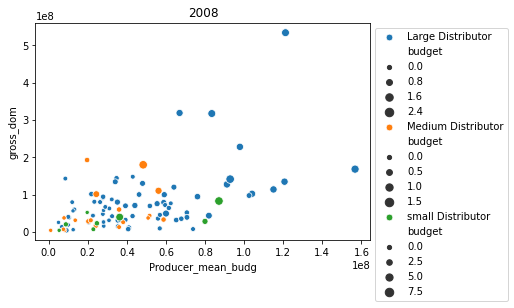

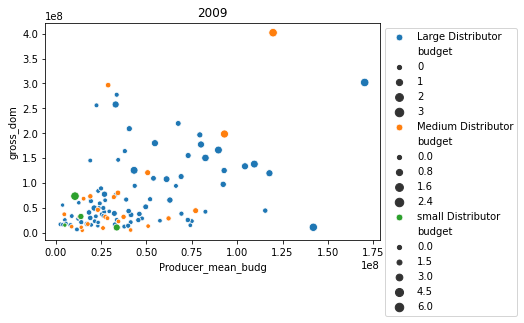

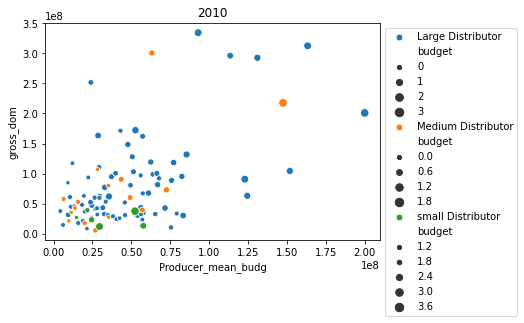

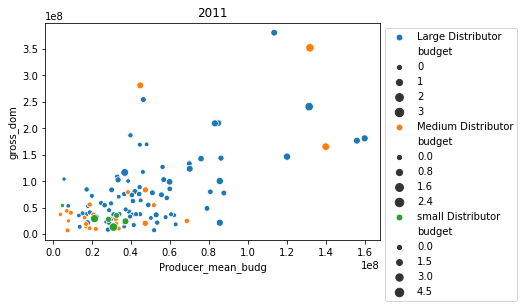

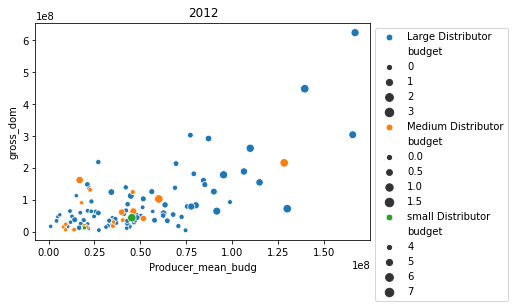

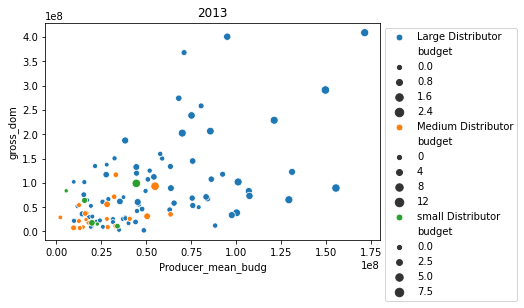

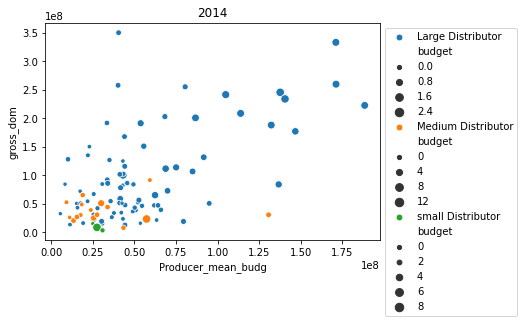

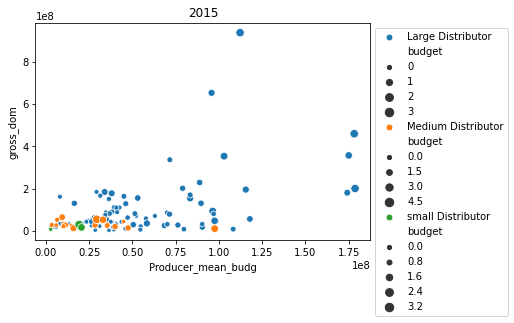

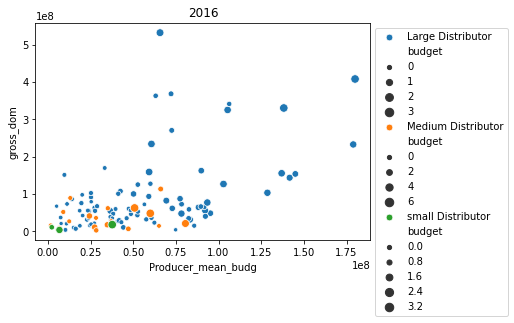

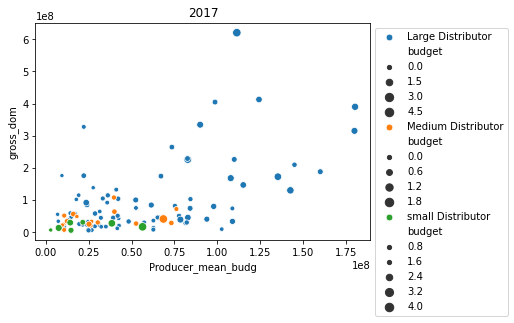

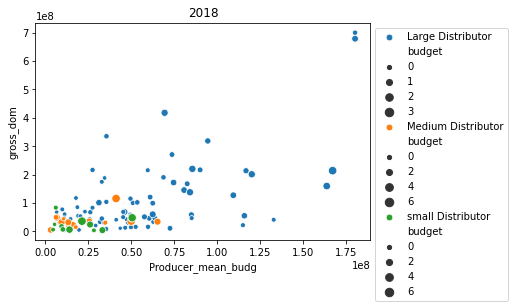

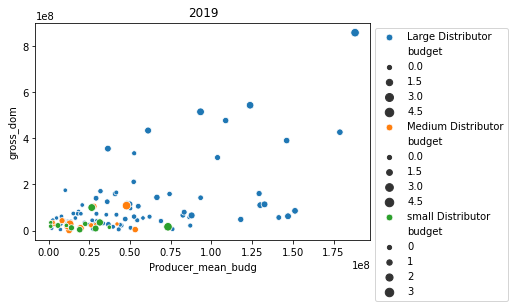

In [300]:
#no matter how much a producer had to play with, they did not necessarily bring in a lot of money
import time
for each in range(20):
    mask1 = (movie_df.Producer_mean_budg>0) & (movie_df.distr.isin(small_distr.keys())) & (movie_df.year==each)
    mask2 = (movie_df.Producer_mean_budg>0) & (movie_df.distr.isin(med_distr.keys())) & (movie_df.year==each)
    mask3 = (movie_df.Producer_mean_budg>0) & (movie_df.distr.isin(major_distr.keys())) & (movie_df.year==each)
    
    plt.figure()
    plt.title(str(int(each)+2000))
    sns.scatterplot(x='Producer_mean_budg', y='gross_dom', data=movie_df[mask3], label='Large Distributor', size='budget')
    sns.scatterplot(x='Producer_mean_budg', y='gross_dom', data=movie_df[mask2], label='Medium Distributor', size='budget')
    sns.scatterplot(x='Producer_mean_budg', y='gross_dom', data=movie_df[mask1], label='small Distributor', size='budget')
    plt.legend(bbox_to_anchor=[1,1])

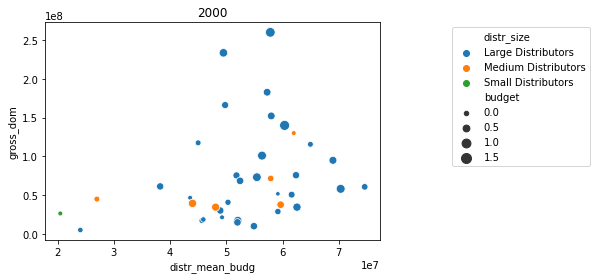

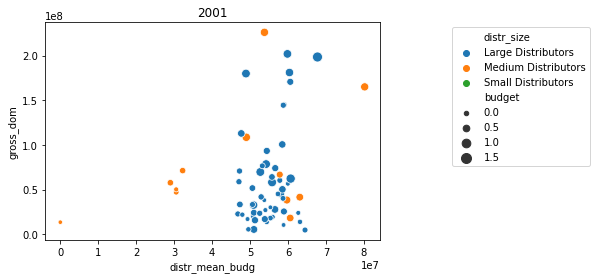

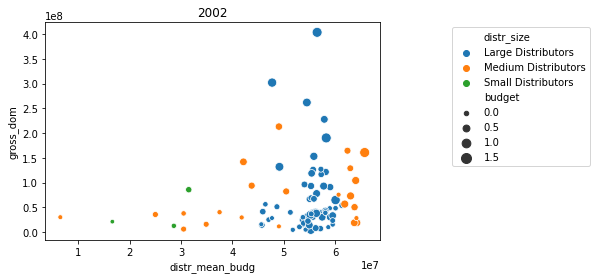

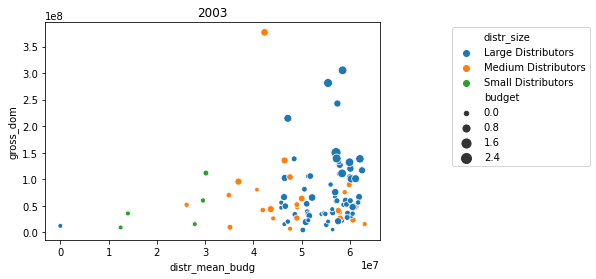

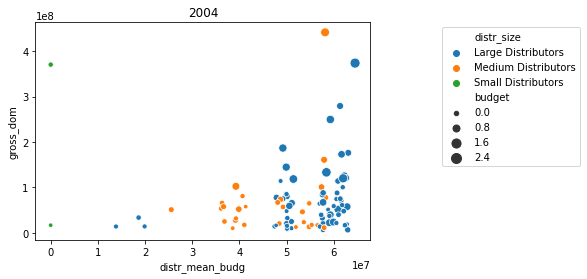

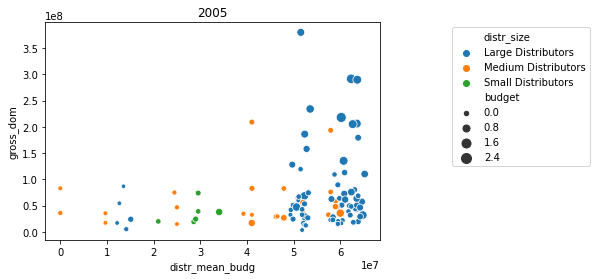

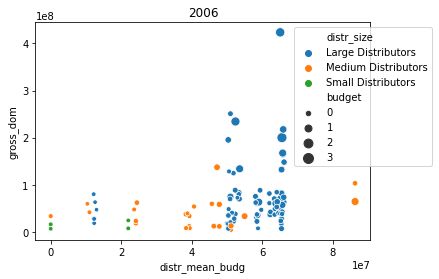

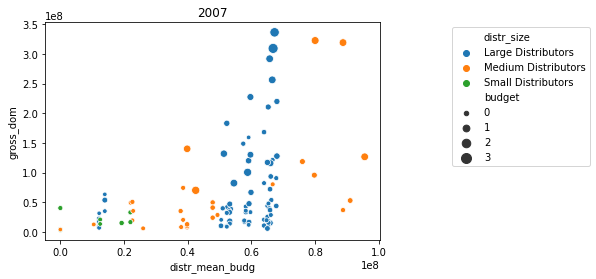

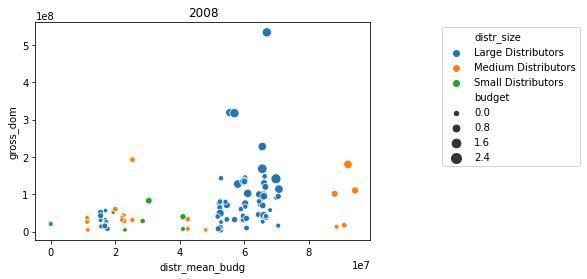

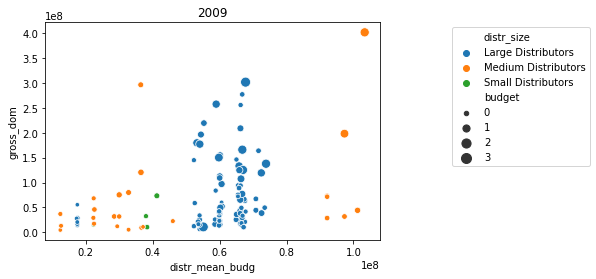

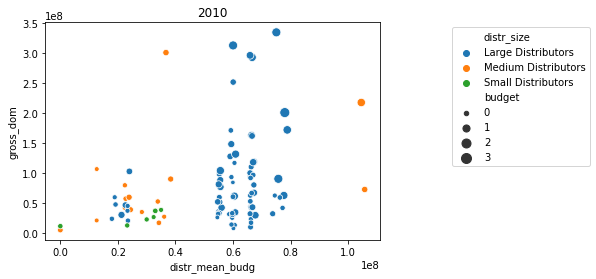

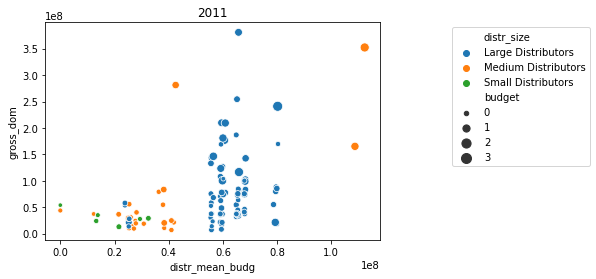

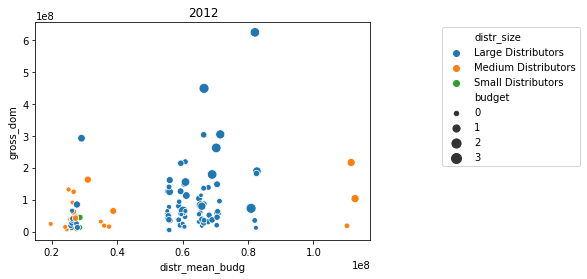

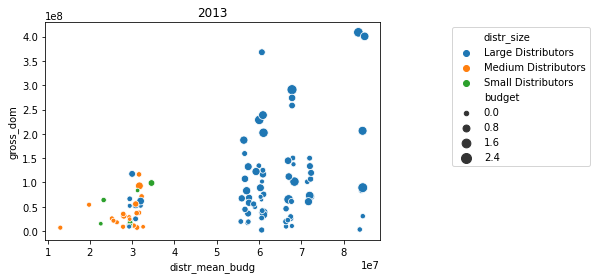

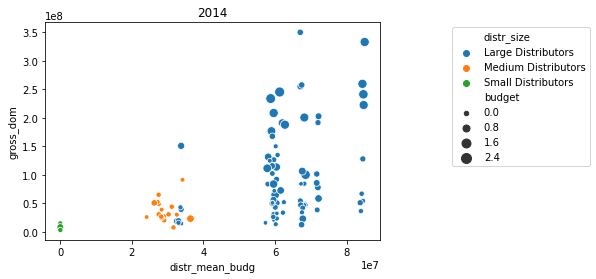

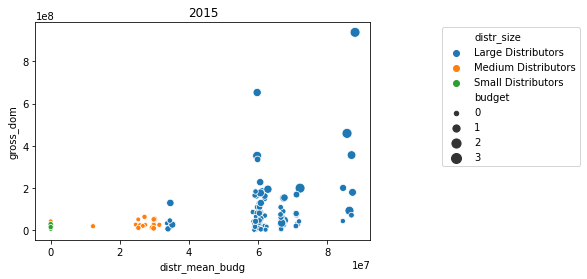

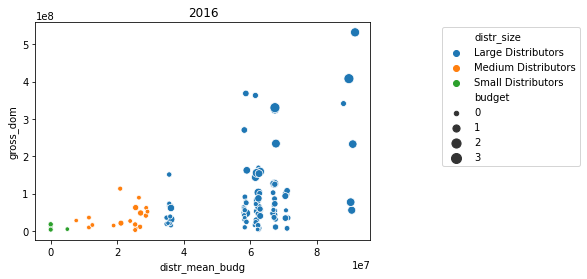

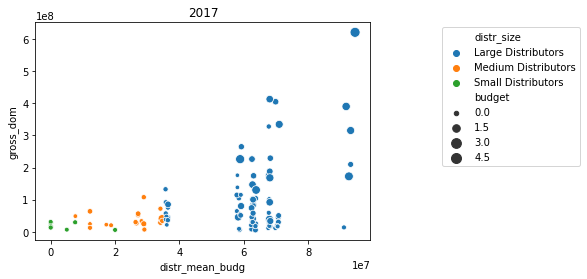

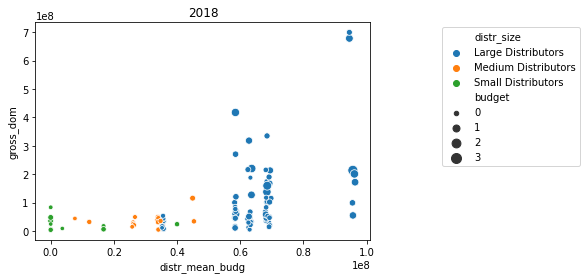

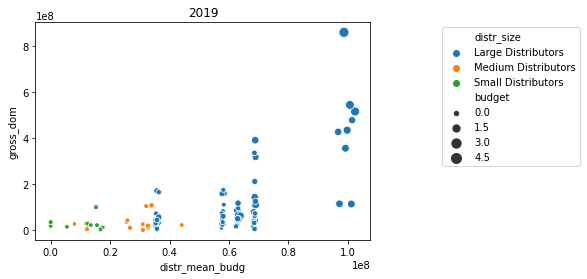

In [304]:
for each in range(20):
    mask = (movie_df.Producer_mean_budg>0) & (movie_df.year==each)

    plt.figure()
    plt.title(str(int(each)+2000))
    sns.scatterplot(x='Producer_mean_budg', y='gross_dom', data=movie_df[mask], hue='distr_size', size='budget', sizes=(20,100), hue_order=['Large Distributors', 'Medium Distributors', 'Small Distributors'])
    plt.legend(bbox_to_anchor=[1.2,1])

In [262]:
movie_df.distr_size.isnull().sum()

0

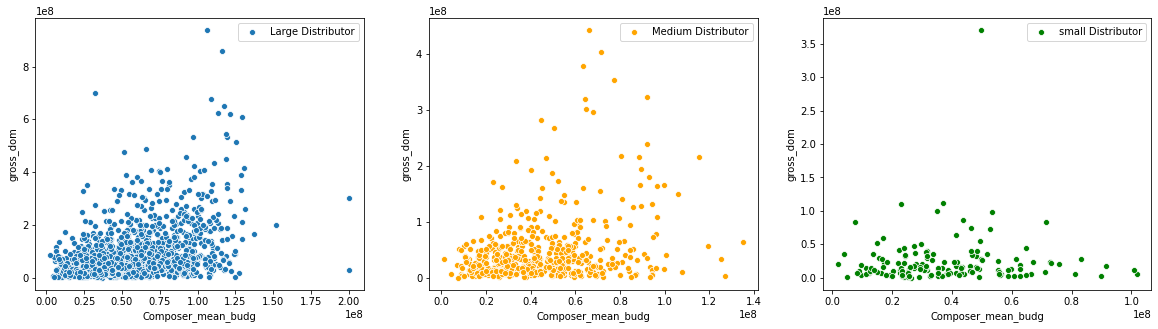

In [226]:
#no matter how much a producer had to play with, they did not necessarily bring in a lot of money
mask1 = (movie_df.Composer_mean_budg>0) & (movie_df.distr.isin(small_distr.keys()))
mask2 = (movie_df.Composer_mean_budg>0) & (movie_df.distr.isin(med_distr.keys()))
mask3 = (movie_df.Composer_mean_budg>0) & (movie_df.distr.isin(major_distr.keys()))
f, ax = plt.subplots(ncols=3, figsize=[20,5])
sns.scatterplot(x='Composer_mean_budg', y='gross_dom', data=movie_df[mask3], label='Large Distributor', ax=ax[0])
sns.scatterplot(x='Composer_mean_budg', y='gross_dom', data=movie_df[mask2], label='Medium Distributor', ax=ax[1], color='orange')
sns.scatterplot(x='Composer_mean_budg', y='gross_dom', data=movie_df[mask1], label='small Distributor', ax=ax[2], color='g')
plt.legend(bbox_to_anchor=[1,1])

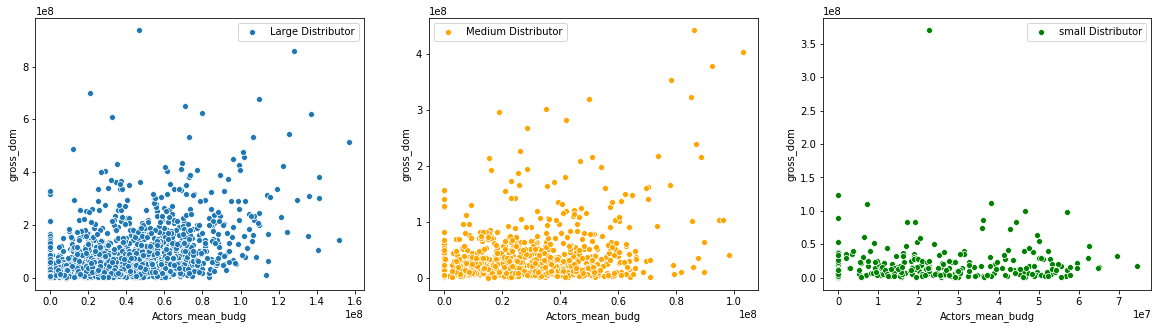

In [250]:
#no matter how much a producer had to play with, they did not necessarily bring in a lot of money
mask1 = (movie_df.distr.isin(small_distr.keys()))
mask2 = (movie_df.distr.isin(med_distr.keys()))
mask3 = (movie_df.distr.isin(major_distr.keys()))
f, ax = plt.subplots(ncols=3, figsize=[20,5])
sns.scatterplot(x='Actors_mean_budg', y='gross_dom', data=movie_df[mask3], label='Large Distributor', ax=ax[0])
sns.scatterplot(x='Actors_mean_budg', y='gross_dom', data=movie_df[mask2], label='Medium Distributor', ax=ax[1], color='orange')
sns.scatterplot(x='Actors_mean_budg', y='gross_dom', data=movie_df[mask1], label='small Distributor', ax=ax[2], color='g')
plt.legend(bbox_to_anchor=[1,1])

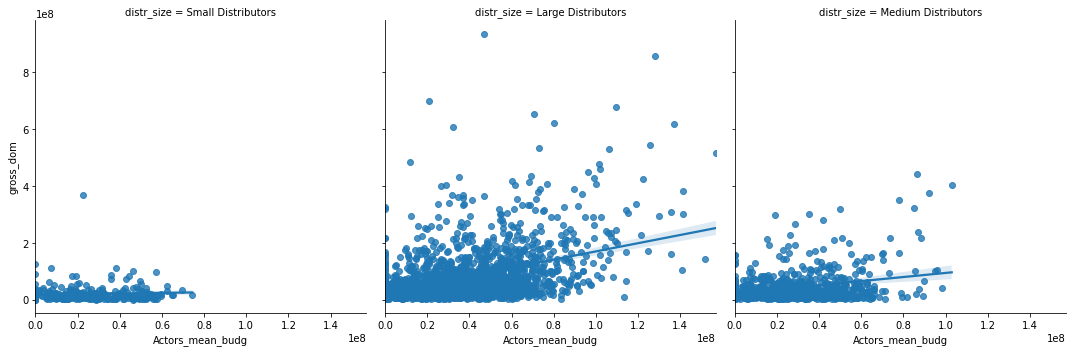

In [249]:
sns.lmplot(x='Actors_mean_budg', y='gross_dom', data=movie_df, col='distr_size')


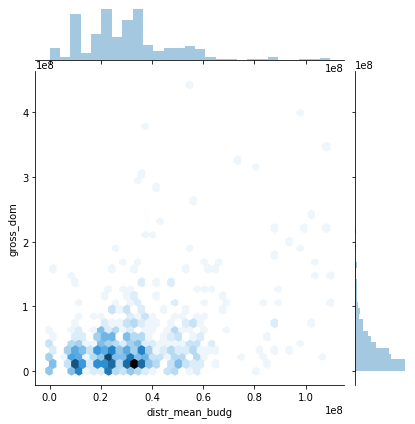

In [188]:
#
sns.jointplot(x='distr_mean_budg', y='gross_dom', data=movie_df[movie_df.distr.isin(med_distr.keys())], kind='hex')


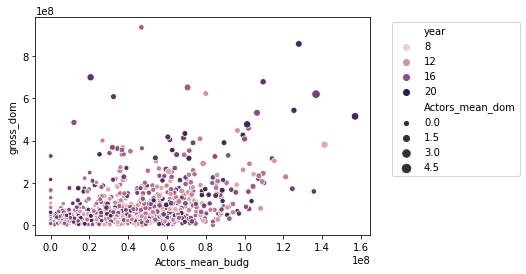

In [168]:
#
mask = (movie_df.distr.isin(major_distr.keys())) & (movie_df.year>10)
sns.scatterplot(x='Actors_mean_budg', y='gross_dom', data=movie_df[mask], size='Actors_mean_dom', hue='year', hue_norm=(9,20))
plt.legend(bbox_to_anchor=(1.05, 1))


In [177]:
movie_df.Writer_mean_budg.describe()

count    2.890000e+03
mean     2.433515e+07
std      3.434195e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.045833e+07
75%      3.704167e+07
max      2.155425e+08
Name: Writer_mean_budg, dtype: float64

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/andrew/opt/anacond

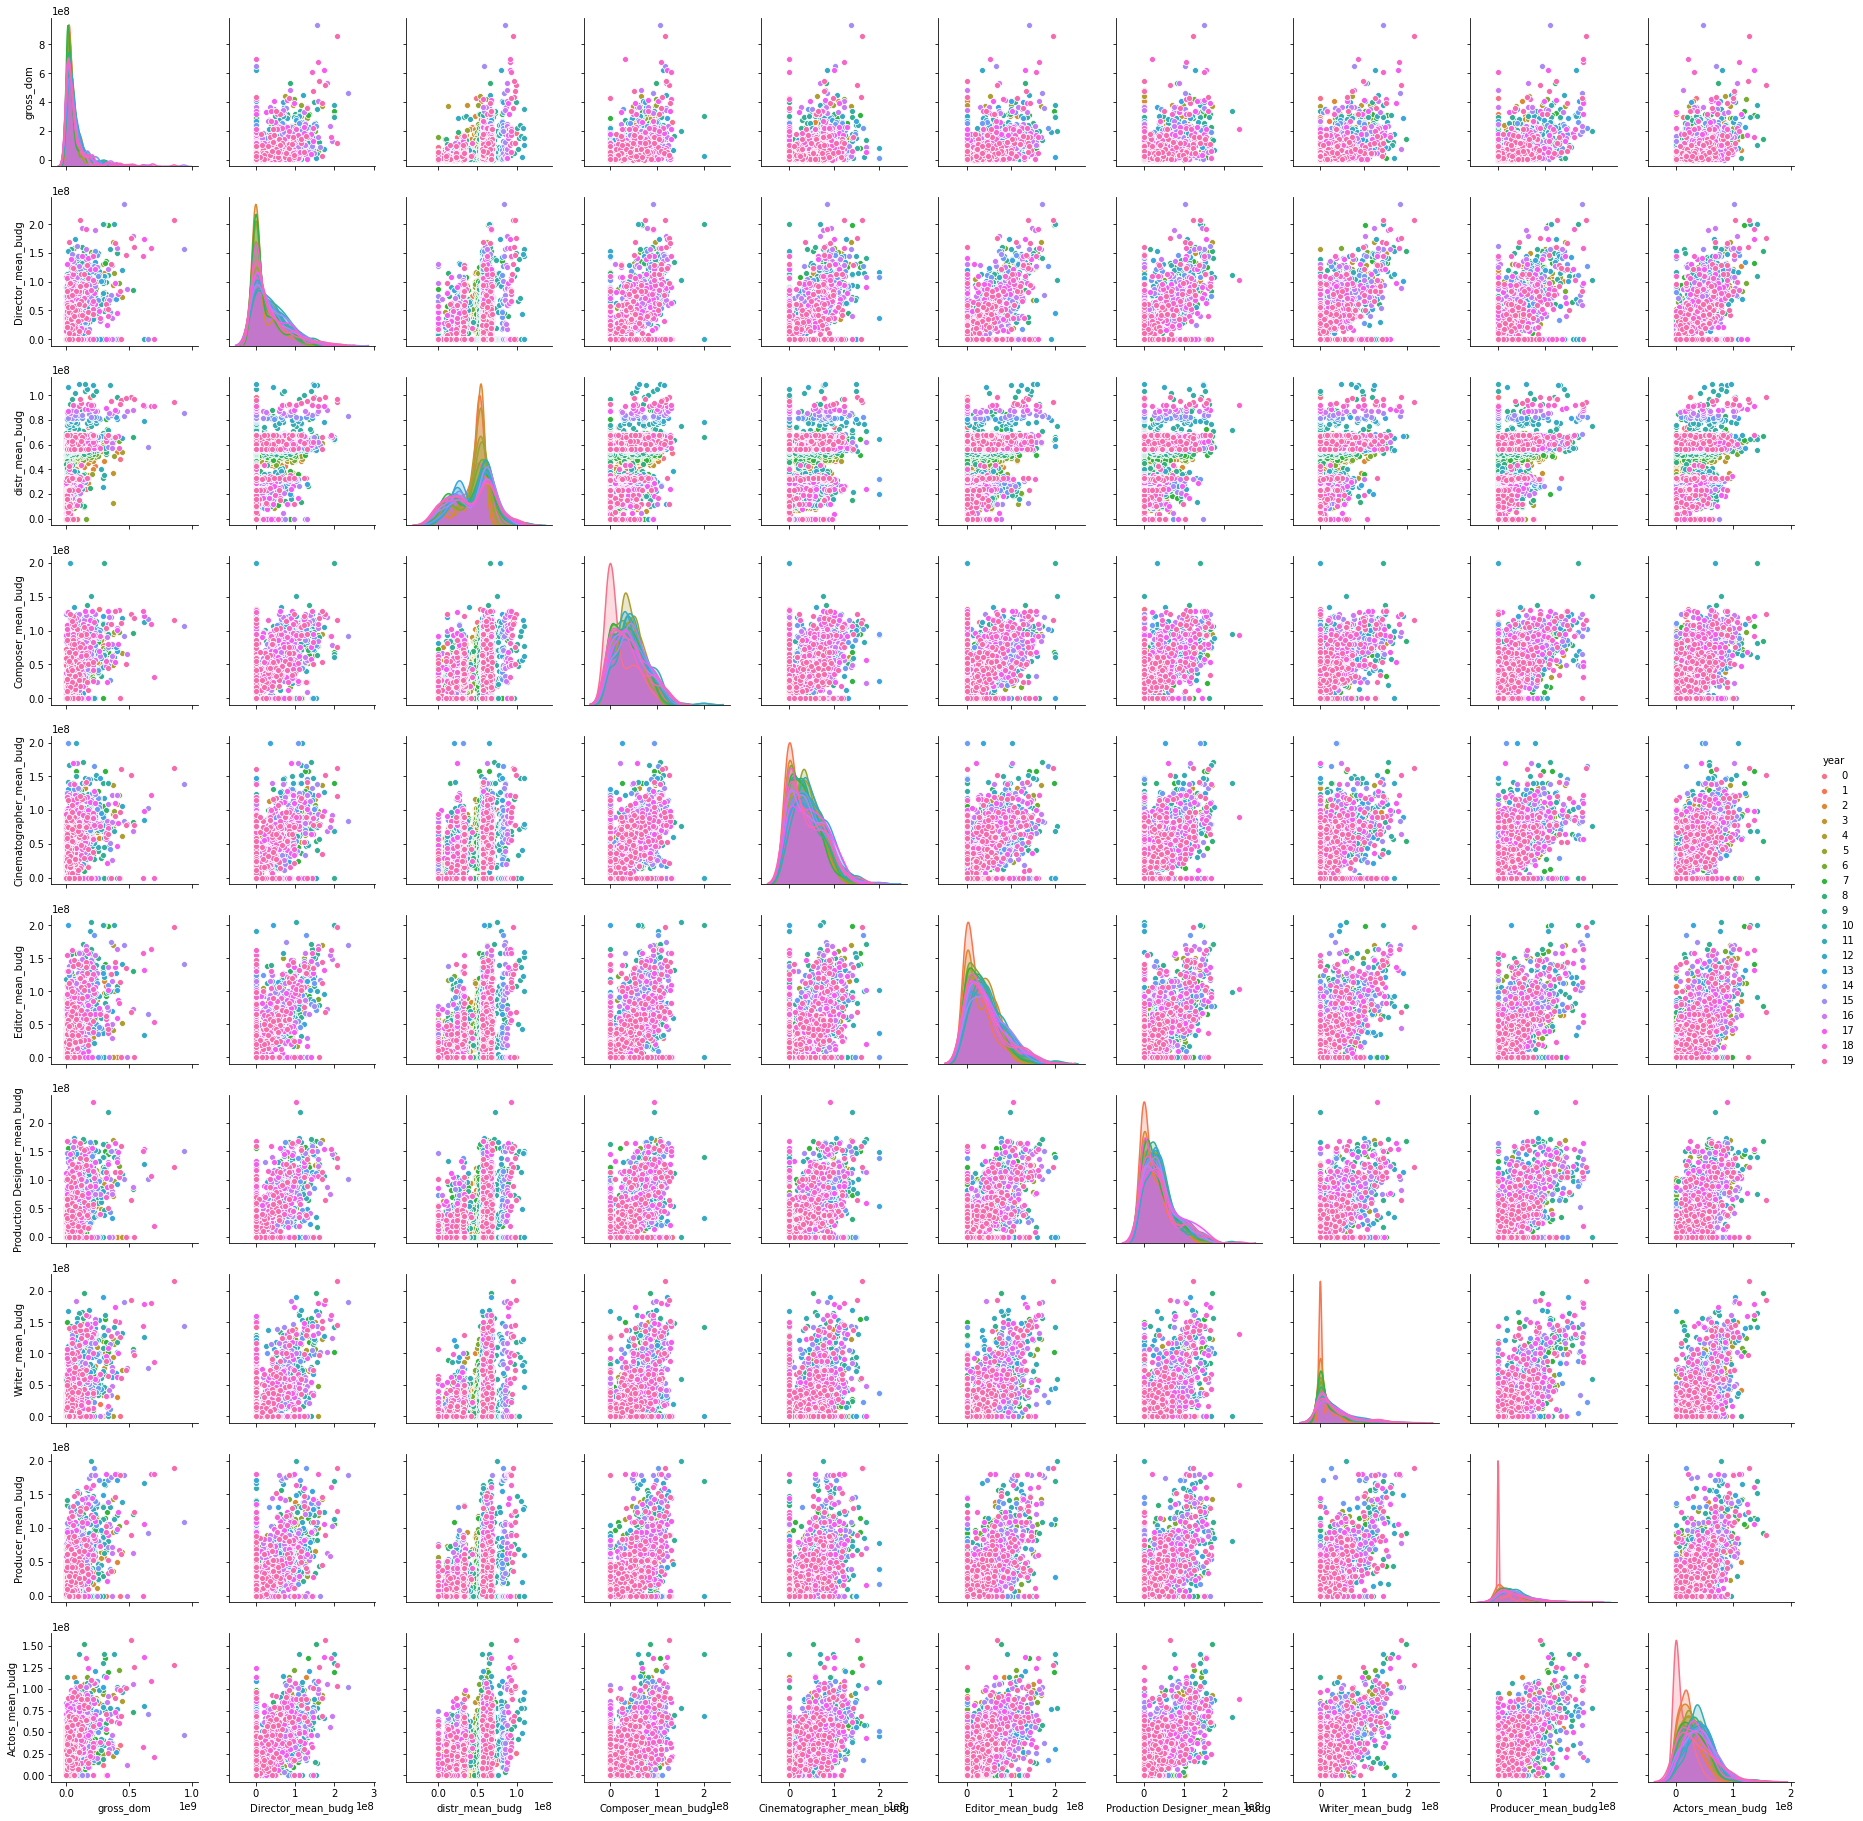

In [239]:
sns.pairplot(movie_df[['gross_dom', 'Director_mean_budg',
               'distr_mean_budg',
               'Composer_mean_budg',
               'Cinematographer_mean_budg',
               'Editor_mean_budg',
               'Production Designer_mean_budg',
               'Writer_mean_budg',
               'Producer_mean_budg',
               'Actors_mean_budg','year']], hue='year')

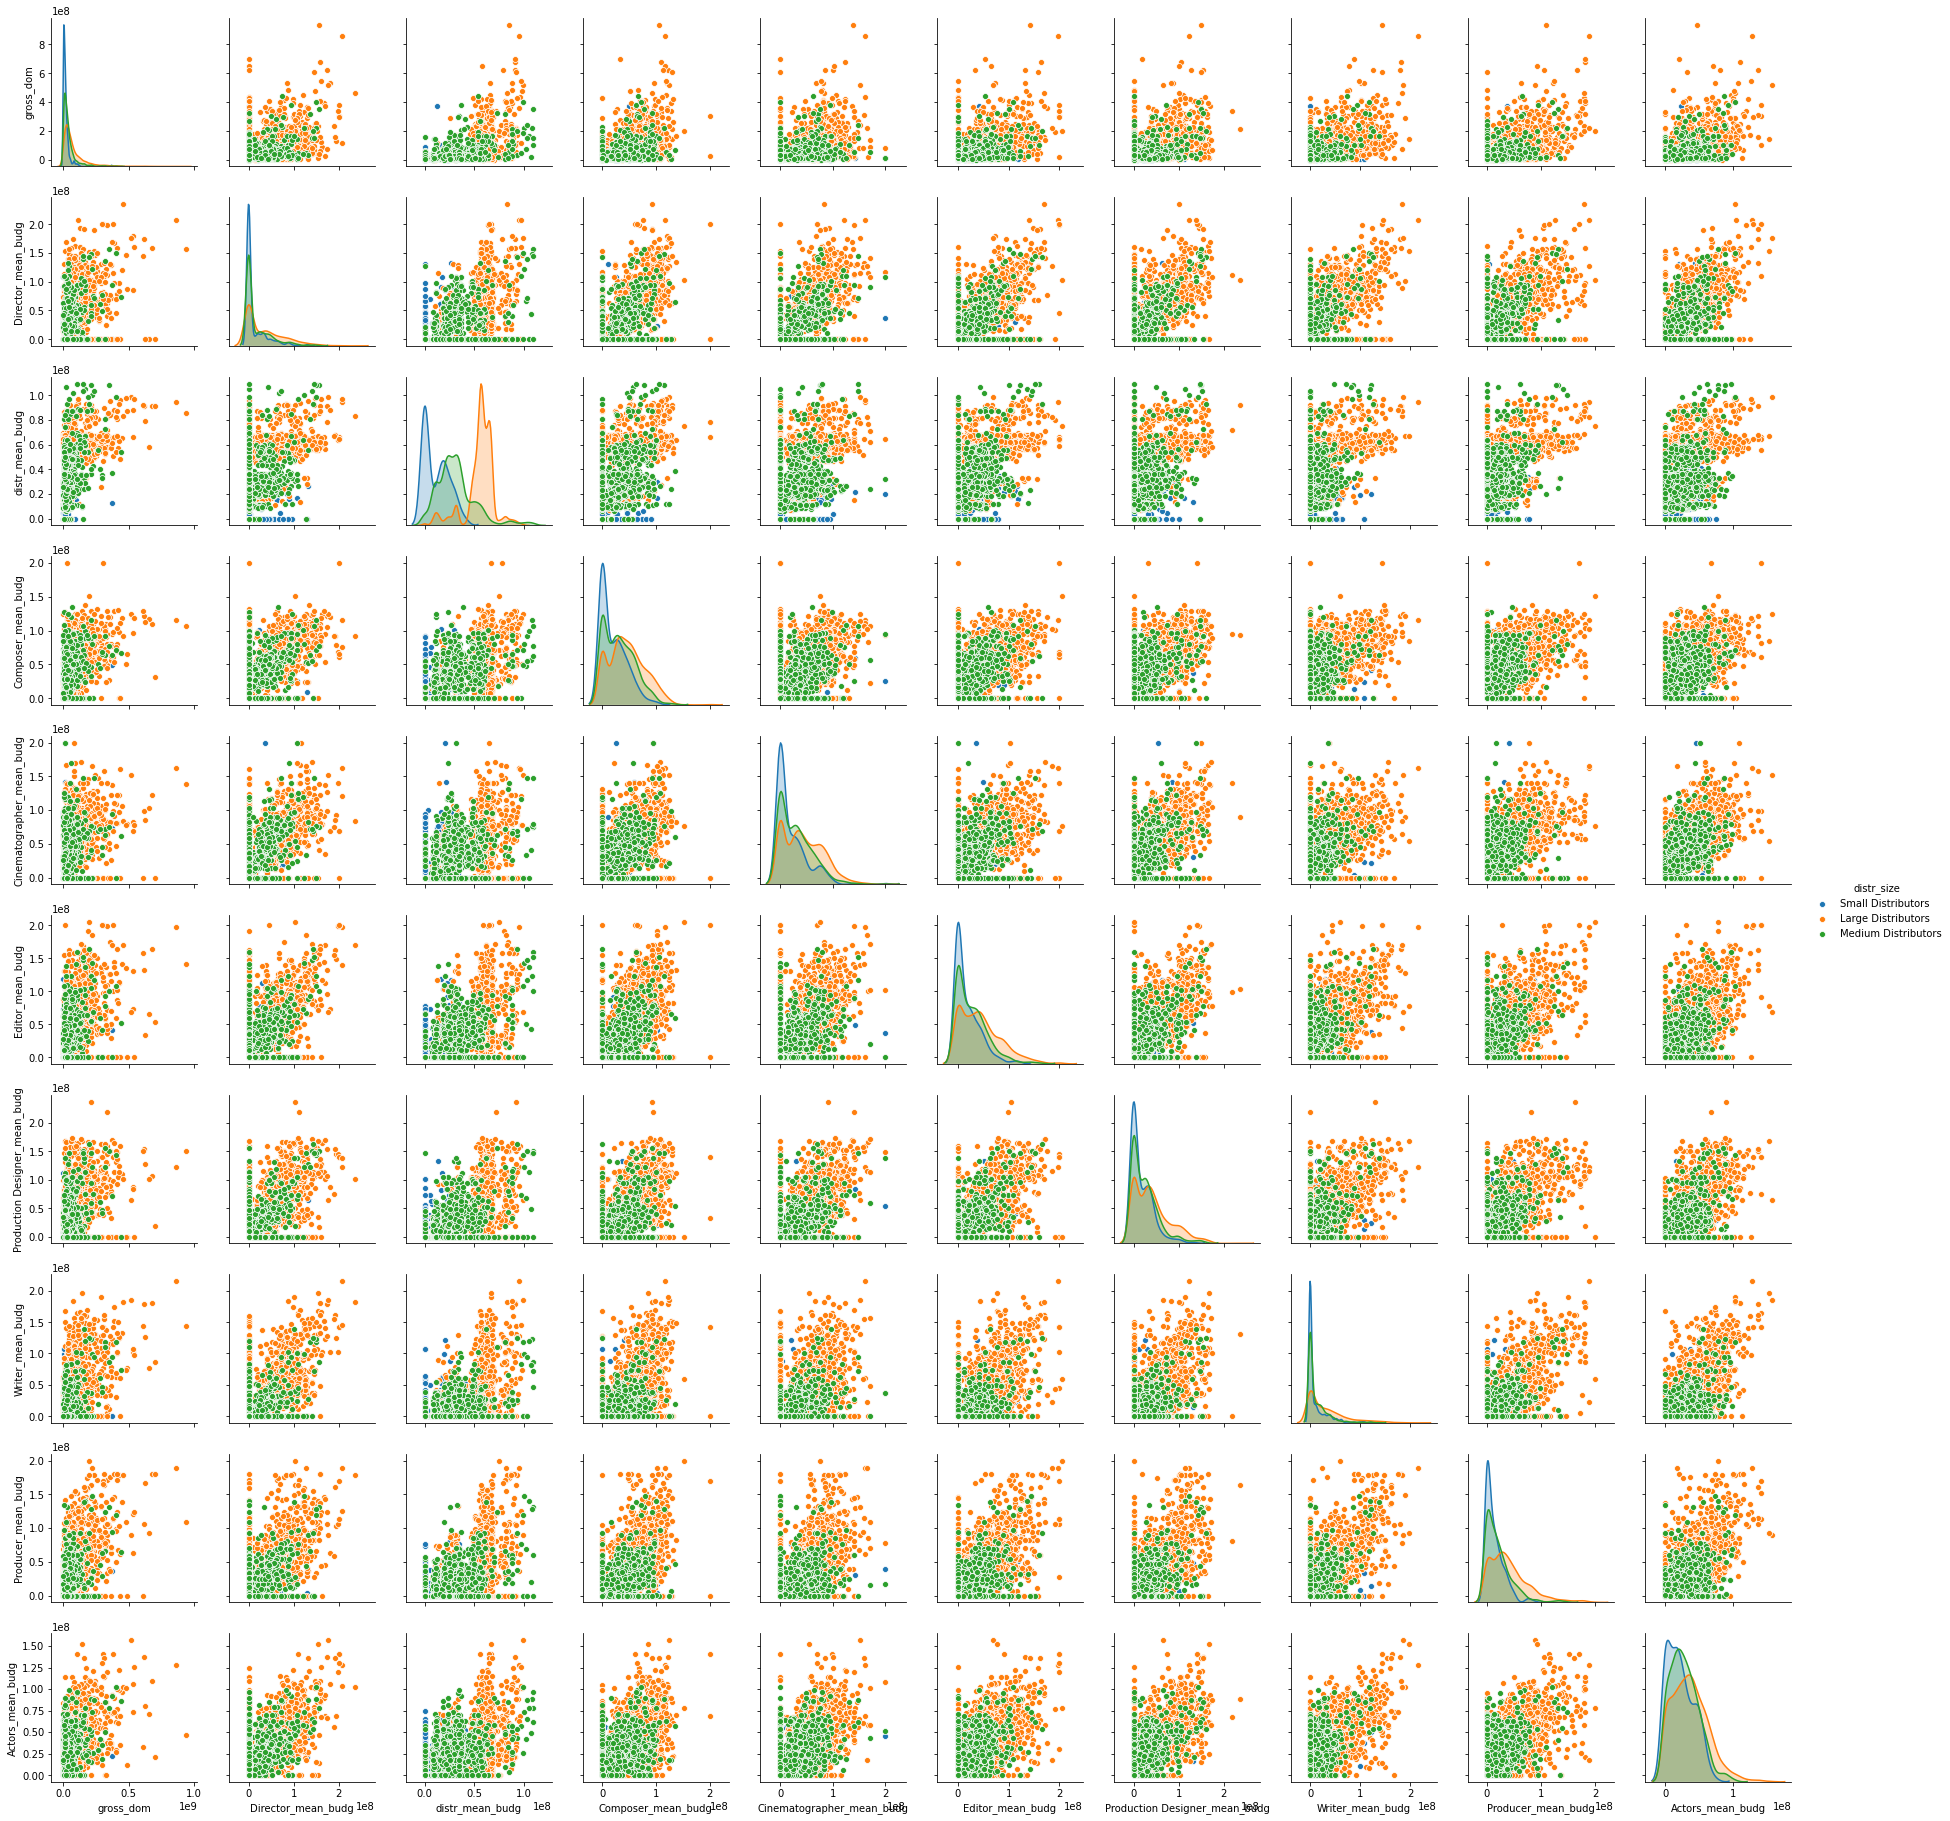

In [238]:
sns.pairplot(movie_df[['gross_dom', 'Director_mean_budg',
               'distr_mean_budg',
               'Composer_mean_budg',
               'Cinematographer_mean_budg',
               'Editor_mean_budg',
               'Production Designer_mean_budg',
               'Writer_mean_budg',
               'Producer_mean_budg',
               'Actors_mean_budg','distr_size']], hue='distr_size')

Text(0.5, 1.0, 'Big Ticket Actor Success')

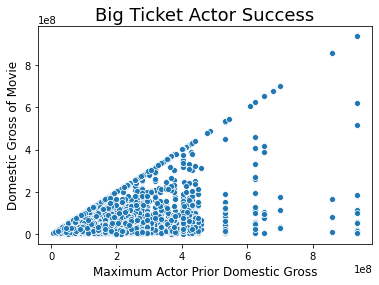

In [332]:
sns.scatterplot(x='Actors_max_dom', y='gross_dom', data=movie_df[movie_df.Actors_max_dom>0])
plt.xlabel('Maximum Actor Prior Domestic Gross', fontsize=12)
plt.ylabel('Domestic Gross of Movie', fontsize=12)
plt.title('Big Ticket Actor Success', fontsize=18)

In [327]:
movie_df[['gross_dom', 'Actors_max_dom']]

gross_dom  Actors_max_dom
title                                              
Sin City                   74103820     293506292.0
Insidious                  54009150     107509799.0
Hop                       108085305     251513985.0
Source Code                54712227     186740799.0
Woman in Gold              33307793     268492764.0
...                             ...             ...
Contagion                  75658097     318604126.0
Sully                     125070033     533345358.0
The Wild Life               8005586             0.0
When the Bough Breaks      29747603     110003217.0
The Disappointments Room    2423468     198542554.0

[2435 rows x 2 columns]

In [334]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [335]:
movie_df.Director

title
Sin City                    Frank Miller, Quentin Tarantino, Robert Rodriguez
Insidious                                                           James Wan
Hop                                                                  Tim Hill
Source Code                                                      Duncan Jones
Woman in Gold                                                    Simon Curtis
                                                  ...                        
Contagion                                                   Steven Soderbergh
Sully                                                          Clint Eastwood
The Wild Life                    Vincent Kesteloot, Ben Stassen, Mimi Maynard
When the Bough Breaks                                              Jon Cassar
The Disappointments Room                                          D.J. Caruso
Name: Director, Length: 2435, dtype: object

In [342]:
text = movie_df.Director.str.split(', ').explode().values


In [343]:
wordcloud = WordCloud().generate(text)

TypeError: cannot use a string pattern on a bytes-like object

In [368]:
names = []
for each in text:
    try:
        names.append(re.search("\w+$", each).group())
    except:
        pass

In [348]:
genre_text = ', '.join(movie_df.genres.explode().values)

In [369]:
wordcloud = WordCloud().generate(' '.join(names))

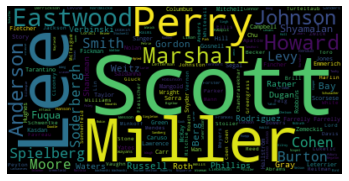

In [370]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [366]:
result = re.search("\w+$", "Quentin Tarantino").group()


In [364]:
result.group()

'Tarantino'

In [385]:
movie_df.corrwith(movie_df.gross_dom).sort_values().tail(20)

Editor_max_dom                  0.526561
Production Designer_max_dom     0.530293
Cinematographer_mean_dom        0.530555
Production Designer_mean_dom    0.537342
Producer_max_dom                0.553618
average_row_budget              0.571322
Director_mean_dom               0.594270
Director_max_dom                0.609636
Writer_max_dom                  0.610241
Editor_mean_dom                 0.611407
budget                          0.626705
Actors_mean_dom                 0.645666
Writer_mean_dom                 0.653958
theaters                        0.656786
Producer_mean_dom               0.675746
theaters_exp                    0.771374
gross_inter                     0.861293
opening                         0.926857
gross_world                     0.940609
gross_dom                       1.000000
dtype: float64

Text(0.5, 6.79999999999999, 'Director ')

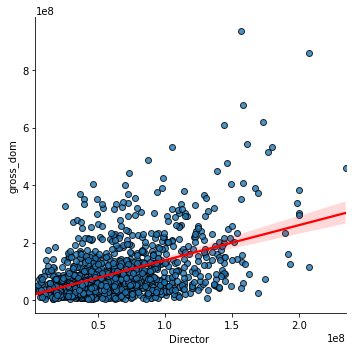

In [387]:
sns.lmplot(x='Director_mean_budg', y='gross_dom', data=movie_df[movie_df.Director_mean_budg>0], scatter_kws={'linewidths':1,'edgecolor':'k'}, line_kws={'color':'r'})
plt.xlabel('Director ')

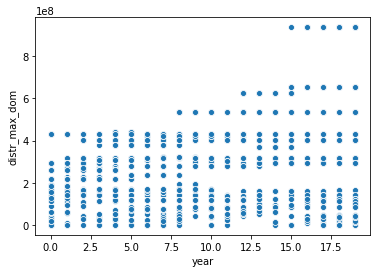

In [388]:
sns.scatterplot(x='year', y='distr_max_dom', data=movie_df)

Text(0.5, 1.0, 'Largest Releases per Year')

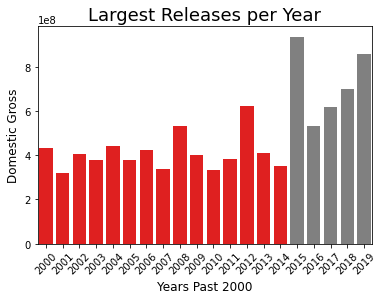

In [426]:
df = movie_df.groupby('year', as_index=False).gross_dom.max()
clrs = ['grey' if (x < max(df.gross_dom)) else 'r' for x in df.gross_dom ]
clrs = ['grey' if (x > 2014) else 'r' for x in df.year ]
sns.barplot(x=df.year, y=df.gross_dom, data=(movie_df.groupby('year', as_index=False).gross_dom.max()), palette=clrs)
plt.ylabel('Domestic Gross', fontsize=12)
plt.xlabel('Years Past 2000', fontsize=12)
plt.xticks(rotation=45)
plt.title('Largest Releases per Year', fontsize=18)



Text(0.5, 1.0, 'Largest Releases per Year')

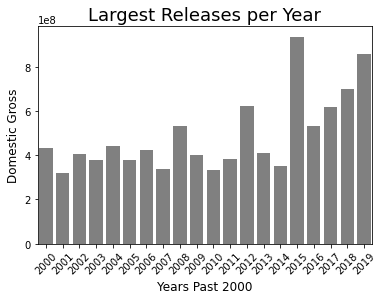

In [424]:
df = movie_df.groupby('year', as_index=False).gross_dom.max()
sns.barplot(x=df.year, y=df.gross_dom, data=(movie_df.groupby('year', as_index=False).gross_dom.max()), color='grey')
plt.ylabel('Domestic Gross', fontsize=12)
plt.xlabel('Years Past 2000', fontsize=12)
plt.xticks(rotation=45)
plt.title('Largest Releases per Year', fontsize=18)


In [415]:
movie_df[movie_df.gross_dom==movie_df.gross_dom.max()].gross_dom

title
Star Wars: Episode VII - The Force Awakens    936662225
Name: gross_dom, dtype: int64

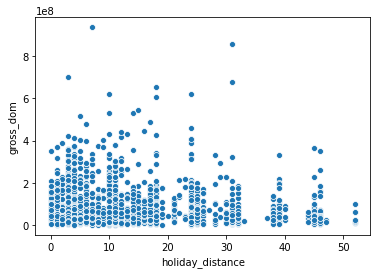

In [427]:
sns.scatterplot(x='holiday_distance', y='gross_dom', data=movie_df)

In [428]:
len(movie_df)

2435